# Midterm Exam 💙 💛 

## Linear Regression

In [1086]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

In [1087]:
df = load_diabetes(as_frame=True, scaled=False)
df = df['frame']

In [1088]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [1089]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


1. Split the data set into a training and test set. `(5 points)`

In [1090]:
# put your answer here
X = df.drop(['target'],axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

2. Use the `the MinMaxScaler()` method to scale down the training and test set. `(5 points)`

In [1091]:
# put your answer here
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Create a new instance of the `LinearRegression` class. `(5 points)`

In [1092]:
# put your answer here
lr_model = LinearRegression()

4. Use the `fit()` method to train the linear regression model using the scaled training set. `(5 points)`

In [1093]:
# put your answer here
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

5. Use the `predict()` method to make predictions using the scaled test set. `(5 points)`

In [1094]:
# put your answer here
y_pred = lr_model.predict(X_test_scaled)

6. Display the intercept, slope and $R^2$. `(5 points)`

In [1095]:
# put your answer here
print(lr_model.intercept_)
print(lr_model.coef_)
r2 = r2_score(y_test, y_pred)
r2

-16.535799535952776
[-2.29890624e-01 -1.97468262e+01  1.42289209e+02  6.91674888e+01
 -3.35696721e+02  1.80844072e+02  1.11667898e+02  1.12949718e+02
  2.07289043e+02  3.23535008e+01]


0.473247633089351

**Normal Equation Function**

In [1096]:
def normal_equation(X, y):

    ones = np.ones((X.shape[0], 1))
    X = np.append(ones, X, axis=1)
    result = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return result, result[0], result[1:]

7. Call the `normal_equation()` function and pass the scaled training set. Display the intercept and slopes.

In [1097]:
# Put your answer here
normal_equation(X_train_scaled, y_train)

(array([-1.65357995e+01, -2.29890624e-01, -1.97468262e+01,  1.42289209e+02,
         6.91674888e+01, -3.35696721e+02,  1.80844072e+02,  1.11667898e+02,
         1.12949718e+02,  2.07289043e+02,  3.23535008e+01]),
 -16.535799535959086,
 array([-2.29890624e-01, -1.97468262e+01,  1.42289209e+02,  6.91674888e+01,
        -3.35696721e+02,  1.80844072e+02,  1.11667898e+02,  1.12949718e+02,
         2.07289043e+02,  3.23535008e+01]))

8. Display the intercept and slopes calculated from the `normal_equation()` function

In [1098]:
# put your answer here

**Stochastic Gradient Descent Function**

In [1099]:
def predicted_y(weight, x, intercept):
    return weight@x + intercept
    
# linear loss
def loss(y, y_predicted):
    n = X.shape[0]
    s = ( y - y_predicted)**2
    return (1/n) * s

#derivative of loss w.r.t weight
def dldw(x, y, y_predicted):
    n = X.shape[0]
    s = -x * (y - y_predicted)
    return (2/n) * s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n =  X.shape[0]
    s = -(y - y_predicted)
    return (2/n) * s
       
# gradient function
def stochastic_gradient_descent(x,y):

    m = np.random.randn(x.shape[1])
    b = 0
    epoch = 2000
    learning_rate = 0.001
    
    n = len(x)
    linear_loss=[]
    
    for i in tqdm(range(epoch)):
        
        for j in range(n):
            random_index = random.randint(0,n-1)
            x_sample = x[random_index]
            y_sample = y[random_index]

            y_predicted = predicted_y(m ,x_sample, b)
         
            m = m - learning_rate * dldw(x_sample, y_sample, y_predicted) 
            b = b - learning_rate * dldb(y_sample, y_predicted)

        linear_loss.append(loss(y_sample, y_predicted))    
        
        
    plt.plot(np.arange(1, epoch), linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return m , b,

9. Call the `stochastic_gradient_descent()` function and display the intercept and slopes. `(5 points)` 

    You do not need to pass the training and test set. Use the raw X and y values from the dataset

100%|██████████| 2000/2000 [00:08<00:00, 233.34it/s]


(array([  0.06410344, -15.34353985,   5.55557963,   1.07751991,
          1.45091813,  -1.71772702,  -3.09622664,  -4.79237198,
          0.24010696,   0.31576527]),
 -2.3359387511652807)

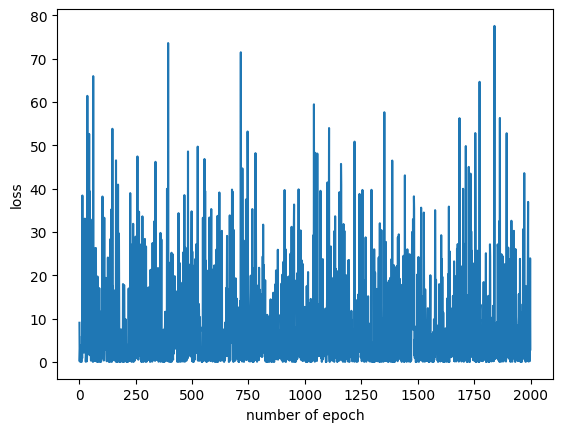

In [1100]:
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = df['target'].values

stochastic_gradient_descent(X, y)

10. Display the intercept and slopes calculated from the `stochastic_gradient_descent()` function

In [1101]:
print(m)
print(b)

[ -0.11229009 -14.48985952   5.56749568   0.95366995   1.71733174
  -1.45807335  -3.19850882  -4.76643585  -1.49863782   0.13504183]
-2.147084302189445
